## Beginning

In [1]:
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from statistics import multimode
from apyori import apriori
import utils

classifiers = ["FTD", "GINCO", "CORE", "GINCO-X-GENRE", "FTD-X-GENRE", "CORE-X-GENRE", "X-GENRE"]

# Open the file

# Show all columns
pd.set_option('display.max_columns', None)

corpus_name = "MaCoCu-is"

#corpus = pd.read_csv("MaCoCu-is_with_predictions.csv",index_col=0, sep="\t")

# Define the extended corpus and domain-level corpus if you already created them
extended_corpus = pd.read_csv(f"{corpus_name}_with_predictions-domain-info-added.csv", sep="\t", index_col = 0)
genre_distribution = pd.read_csv(f"{corpus_name}-domain-level.csv", sep="\t", index_col = 0)

## General analysis

### Label confidence per classifier

In [4]:
# Print the label confidence for each classifier
utils.label_confidence(corpus, classifiers)

| classifier    |   min |   median |   max |
|:--------------|------:|---------:|------:|
| X-GENRE       |  0.32 |     1    |  1    |
| GINCO-X-GENRE |  0.28 |     0.97 |  0.99 |
| CORE          |  0.19 |     0.91 |  0.99 |
| GINCO         |  0.2  |     0.9  |  0.98 |
| FTD           |  0.15 |     0.7  |  0.97 |
| FTD-X-GENRE   |  0.17 |     0.67 |  0.97 |
| CORE-X-GENRE  |  0.16 |     0.59 |  0.95 |


### Most frequent values per classifier

In [5]:
utils.most_frequent_values(corpus, classifiers)

| classifier    | most frequent label                             |
|:--------------|:------------------------------------------------|
| FTD           | ('A12 (promotion)', 0.31)                       |
| GINCO         | ('Information/Explanation', 0.25)               |
| CORE          | ('Informational Description/Explanation', 0.58) |
| GINCO-X-GENRE | ('Information/Explanation', 0.25)               |
| FTD-X-GENRE   | ('Promotion', 0.36)                             |
| CORE-X-GENRE  | ('Information/Explanation', 0.37)               |
| X-GENRE       | ('Information/Explanation', 0.22)               |


### Label distribution per classifier

In [4]:
# Create a dataframe with label distribution per classifier
utils.label_distribution(corpus, classifiers)


| label_distribution_FTD       | label_distribution_GINCO             | label_distribution_CORE                         | label_distribution_GINCO-X-GENRE   | label_distribution_FTD-X-GENRE    | label_distribution_CORE-X-GENRE   | label_distribution_X-GENRE        |
|:-----------------------------|:-------------------------------------|:------------------------------------------------|:-----------------------------------|:----------------------------------|:----------------------------------|:----------------------------------|
| ('A12 (promotion)', 0.31)    | ('Information/Explanation', 0.25)    | ('Informational Description/Explanation', 0.58) | ('Information/Explanation', 0.25)  | ('Promotion', 0.36)               | ('Information/Explanation', 0.37) | ('Information/Explanation', 0.22) |
| ('A16 (information)', 0.2)   | ('Opinion/Argumentation', 0.22)      | ('Narrative', 0.23)                             | ('Promotion', 0.22)                | ('Information/Explanation', 0.27) | ('Ne

## Analysis based on domains

### Create a domain level corpus and the extended corpus

In [2]:
# Create a corpus where instances are grouped into domains, and with additional information on the most common labels per domains
genre_distribution = utils.calculate_label_per_domain(corpus, classifiers)

genre_distribution.head(3)


,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,10000tw.blogspot.com,"{'A11 (personal)': 3, 'A16 (information)': 5, ...","{'List of Summaries/Excerpts': 3, 'Information...","{'Narrative': 5, 'Informational Description/Ex...","{'Opinion/Argumentation': 3, 'Information/Expl...","{'News': 4, 'Information/Explanation': 4, 'Opi...","{'Prose/Lyrical': 3, 'Information/Explanation'...","{'Prose/Lyrical': 1, 'Information/Explanation'...",5,5,5,4,4,5,6,A16 (information),no,Information/Explanation,no,Narrative,yes,Information/Explanation,no,News,yes,Information/Explanation,no,Information/Explanation,no
1,101hafnarfjordur.blogspot.com,"{'A1 (argumentative)': 7, 'A11 (personal)': 3}","{'Opinion/Argumentation': 7, 'Forum': 3}","{'Narrative': 6, 'Opinion': 4}","{'Opinion/Argumentation': 5, 'Other': 2, 'Foru...","{'Opinion/Argumentation': 6, 'Information/Expl...","{'Opinion/Argumentation': 3, 'Forum': 3, 'Othe...","{'Opinion/Argumentation': 9, 'Forum': 1}",7,7,6,5,6,3,9,A1 (argumentative),no,Opinion/Argumentation,no,Narrative,no,Opinion/Argumentation,no,Opinion/Argumentation,no,Opinion/Argumentation,yes,Opinion/Argumentation,no
2,101midborg.is,"{'A12 (promotion)': 8, 'A16 (information)': 2}","{'Promotion': 4, 'Information/Explanation': 5,...",{'Informational Description/Explanation': 10},"{'Promotion': 6, 'Information/Explanation': 4}","{'Promotion': 7, 'Information/Explanation': 3}","{'Opinion/Argumentation': 3, 'Information/Expl...","{'Promotion': 5, 'Information/Explanation': 5}",8,5,10,6,7,5,5,A12 (promotion),no,Information/Explanation,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Information/Explanation,yes


In [3]:
# Save the domain-level corpus
genre_distribution.to_csv(f"{corpus_name}-domain-level.csv", sep="\t")

In [3]:
# Then merge the domain-level df with the initial corpus so that all the domain information will be added to each instance from the domain
extended_corpus = pd.merge(left = corpus, right = genre_distribution, how = "left", left_on= "domain", right_on= "domain_id", suffixes=["",""])

extended_corpus.head(2)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,ft.is,https://ft.is/,Félag Tölvunarfræðinga\nMarkmið félagsins er a...,"<doc id=""macocu.is.97"" title=""Félag Tölvunarfr...",255,A12 (promotion),"{7: 0.0106, 8: 0.0275, 0: 0.0294, 1: 0.0066, 6...",0.853838,List of Summaries/Excerpts,"{'Forum': 0.0057, 'News/Reporting': 0.0322, 'O...",0.894127,Informational Description/Explanation,"{'Interactive Discussion': 0.0019, 'Narrative'...",0.972140,News,"{'Information/Explanation': 0.0036, 'Opinion/A...",0.933308,Promotion,"{'Promotion': 0.6432, 'Opinion/Argumentation':...",0.643164,Information/Explanation,"{'Other': 0.048, 'Information/Explanation': 0....",0.516619,News,"{'Other': 0.0114, 'Information/Explanation': 0...",0.984309,ft.is,"{'A12 (promotion)': 5, 'A8 (news)': 2, 'A9 (le...","{'List of Summaries/Excerpts': 4, 'Other': 1, ...","{'Informational Description/Explanation': 9, '...","{'News': 6, 'Other': 2, 'Information/Explanati...","{'Promotion': 6, 'News': 2, 'Legal': 1, 'Infor...","{'Information/Explanation': 6, 'News': 3, 'Opi...","{'News': 8, 'Legal': 1, 'Information/Explanati...",5,4,9,6,6,6,8,A12 (promotion),no,List of Summaries/Excerpts,no,Informational Description/Explanation,no,News,no,Promotion,no,Information/Explanation,no,News,no
1,pfi.is,http://www.pfi.is/,Stefnt er að því að halda þessa fundi í septem...,"<doc id=""macocu.is.142"" title=""Póstmannafélag ...",304,A12 (promotion),"{7: 0.029, 8: 0.0436, 0: 0.0413, 1: 0.0094, 6:...",0.679917,Information/Explanation,"{'Forum': 0.0363, 'News/Reporting': 0.0227, 'O...",0.522654,Informational Description/Explanation,"{'Interactive Discussion': 0.0021, 'Narrative'...",0.968317,Information/Explanation,"{'Information/Explanation': 0.9309, 'Opinion/A...",0.930899,Promotion,"{'Promotion': 0.8225, 'Opinion/Argumentation':...",0.822453,Information/Explanation,"{'Other': 0.0364, 'Information/Explanation': 0...",0.446269,Legal,"{'Other': 0.1241, 'Information/Explanation': 0...",0.795132,pfi.is,"{'A12 (promotion)': 4, 'A8 (news)': 1, 'A16 (i...","{'Information/Explanation': 7, 'News/Reporting...",{'Informational Description/Explanation': 10},"{'Information/Explanation': 7, 'News': 1, 'Ins...","{'Promotion': 4, 'News': 1, 'Information/Expla...","{'Information/Explanation': 6, 'Instruction': ...","{'Legal': 3, 'Information/Explanation': 5, 'Ne...",4,7,10,7,4,6,5,A12 (promotion),no,Information/Explanation,no,Informational Description/Explanation,no,Information/Explanation,no,Promotion,no,Information/Explanation,no,Information/Explanation,no


In [5]:
# Save the extended corpus
extended_corpus.to_csv(f"{corpus_name}_with_predictions-domain-info-added.csv", sep="\t")

### Graphs based on frequency of most frequent label in the domains

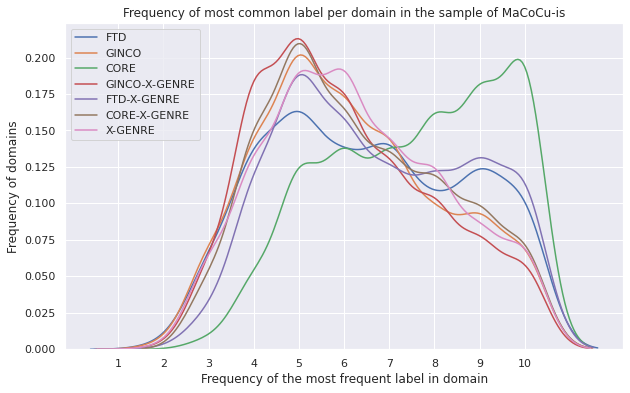

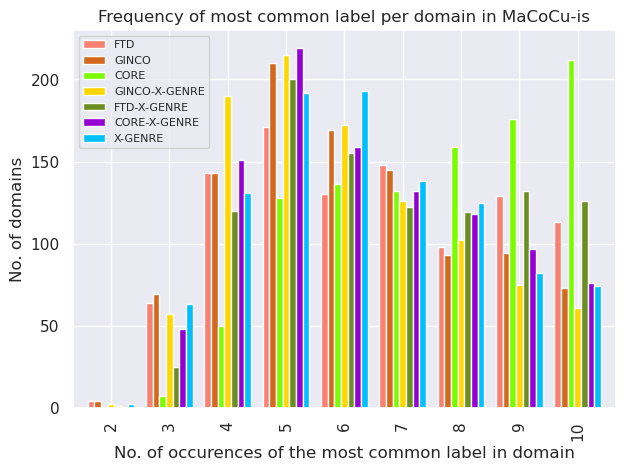

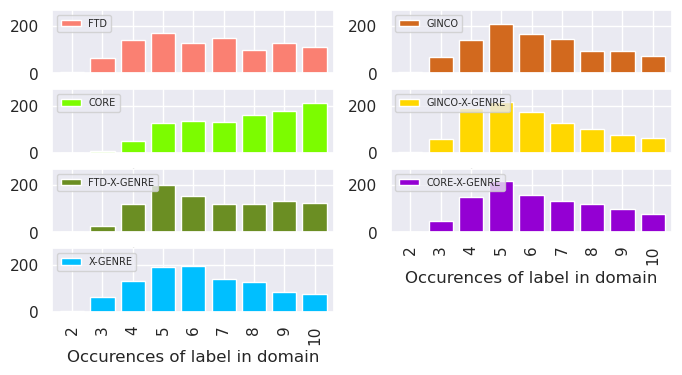

In [2]:
utils.create_graphs(genre_distribution, classifiers, "MaCoCu-is")

### Most frequent labels per domain
We will look into how many times each specific category was most frequent on a domain. For this, I will use the domain-level corpus (genre_distribution dataframe). I will group the texts into domains and calculate for each label in each schema in how many domains it is the most frequent.

In [4]:
utils.label_distribution_per_domain(genre_distribution, classifiers)

| label_distribution_FTD      | label_distribution_GINCO             | label_distribution_CORE                         | label_distribution_GINCO-X-GENRE   | label_distribution_FTD-X-GENRE    | label_distribution_CORE-X-GENRE   | label_distribution_X-GENRE        |
|:----------------------------|:-------------------------------------|:------------------------------------------------|:-----------------------------------|:----------------------------------|:----------------------------------|:----------------------------------|
| ('A12 (promotion)', 0.35)   | ('Information/Explanation', 0.27)    | ('Informational Description/Explanation', 0.65) | ('Information/Explanation', 0.27)  | ('Promotion', 0.41)               | ('Information/Explanation', 0.43) | ('News', 0.25)                    |
| ('A16 (information)', 0.21) | ('Opinion/Argumentation', 0.25)      | ('Narrative', 0.2)                              | ('Promotion', 0.24)                | ('Information/Explanation', 0.27) | ('News',

### Calculating scores assuming domains are uni-genre
Calculating F1, precision, recall assuming that domains are uni-genre. To calculate this, I will take the predicted labels as y_pred and the most_frequent_label (most frequent label in domain) labels as y_true.

For this, I will use the extended corpus (which is instance-level, but contains the information on domains).

Classifier: FTD
Macro F1: 0.49, Micro F1: 0.65, Accuracy: 0.65
Krippendorfs Alpha: 0.56


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/

                    precision    recall  f1-score   support

   A12 (promotion)       0.81      0.69      0.75      3560
 A16 (information)       0.63      0.61      0.62      2070
      A17 (review)       0.33      0.54      0.41       310
        A9 (legal)       0.35      0.53      0.42       160
  A7 (instruction)       0.36      0.56      0.44       280
         A8 (news)       0.51      0.54      0.52       850
A1 (argumentative)       0.73      0.71      0.72      1990
    A11 (personal)       0.60      0.66      0.63       740
    A14 (academic)       0.00      0.00      0.00         0
      A4 (fiction)       0.35      0.55      0.43        40

          accuracy                           0.65     10000
         macro avg       0.47      0.54      0.49     10000
      weighted avg       0.68      0.65      0.66     10000



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


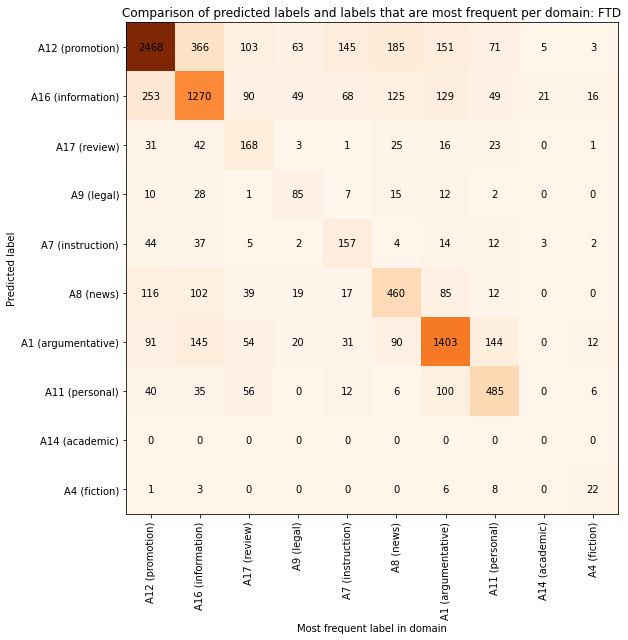

Classifier: GINCO
Macro F1: 0.52, Micro F1: 0.62, Accuracy: 0.62
Krippendorfs Alpha: 0.53
                            precision    recall  f1-score   support

List of Summaries/Excerpts       0.25      0.44      0.32       380
   Information/Explanation       0.68      0.63      0.66      2670
                 Promotion       0.74      0.66      0.70      1610
                     Other       0.16      0.48      0.25       130
            News/Reporting       0.66      0.57      0.61      1800
               Instruction       0.32      0.57      0.41       290
     Opinion/Argumentation       0.73      0.65      0.68      2500
          Legal/Regulation       0.38      0.61      0.47        70
                     Forum       0.56      0.65      0.60       550

                  accuracy                           0.62     10000
                 macro avg       0.50      0.59      0.52     10000
              weighted avg       0.66      0.62      0.63     10000



<Figure size 432x288 with 0 Axes>

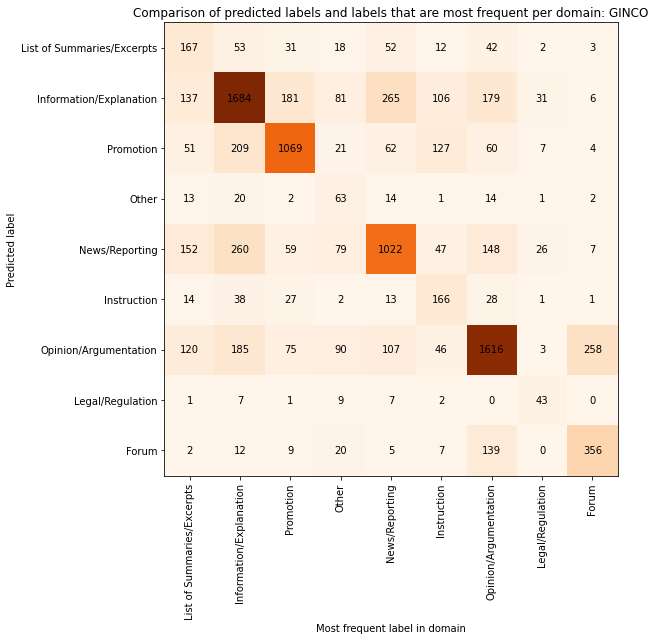

Classifier: CORE
Macro F1: 0.51, Micro F1: 0.76, Accuracy: 0.76
Krippendorfs Alpha: 0.57


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       precision    recall  f1-score   support

Informational Description/Explanation       0.91      0.81      0.85      6480
                              Opinion       0.61      0.61      0.61       760
                            Narrative       0.61      0.69      0.65      2000
             Informational Persuasion       0.49      0.61      0.55       320
                 How-To/Instructional       0.55      0.74      0.63       240
               Interactive Discussion       0.26      0.59      0.37       160
                              Lyrical       0.30      0.68      0.42        40
                               Spoken       0.00      0.00      0.00         0

                             accuracy                           0.76     10000
                            macro avg       0.47      0.59      0.51     10000
                         weighted avg       0.79      0.76      0.77     10000



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

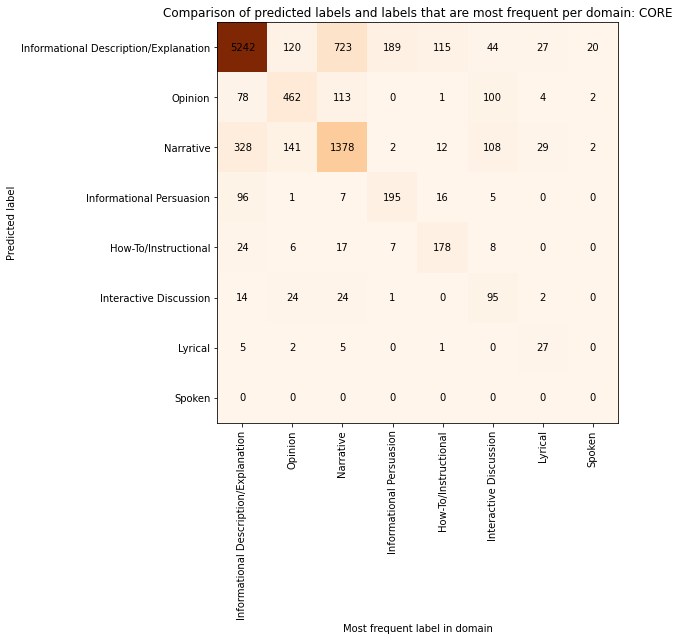

Classifier: GINCO-X-GENRE
Macro F1: 0.54, Micro F1: 0.6, Accuracy: 0.6
Krippendorfs Alpha: 0.52
                         precision    recall  f1-score   support

                   News       0.64      0.56      0.60      1560
Information/Explanation       0.68      0.62      0.65      2730
              Promotion       0.71      0.65      0.68      2370
                  Other       0.35      0.49      0.41       880
            Instruction       0.36      0.62      0.45       370
  Opinion/Argumentation       0.66      0.60      0.63      1560
                  Legal       0.31      0.64      0.42        70
          Prose/Lyrical       0.53      0.46      0.49        50
                  Forum       0.50      0.58      0.54       410

               accuracy                           0.60     10000
              macro avg       0.53      0.58      0.54     10000
           weighted avg       0.63      0.60      0.61     10000



<Figure size 432x288 with 0 Axes>

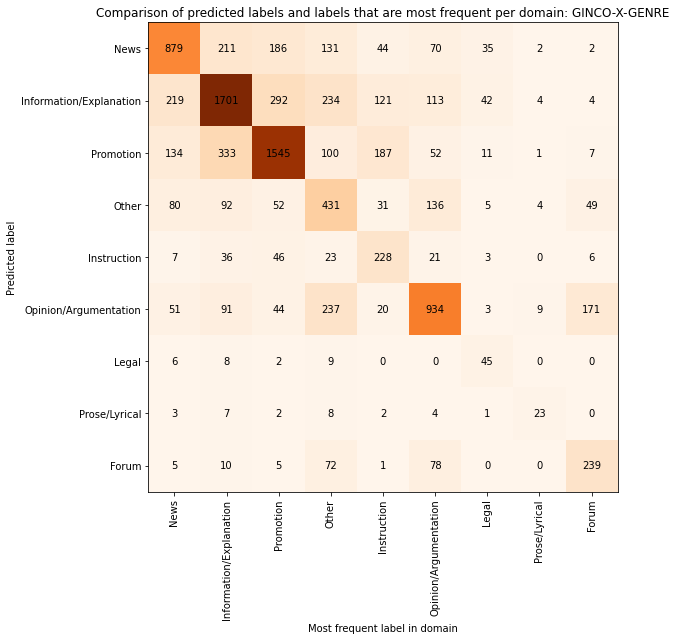

Classifier: FTD-X-GENRE
Macro F1: 0.56, Micro F1: 0.67, Accuracy: 0.67
Krippendorfs Alpha: 0.56
                         precision    recall  f1-score   support

              Promotion       0.81      0.72      0.76      4050
Information/Explanation       0.66      0.66      0.66      2730
                  Legal       0.35      0.61      0.45       200
            Instruction       0.33      0.69      0.45       190
                   News       0.59      0.58      0.58      1670
  Opinion/Argumentation       0.71      0.68      0.69      1090
          Prose/Lyrical       0.23      0.59      0.33        70

               accuracy                           0.67     10000
              macro avg       0.52      0.65      0.56     10000
           weighted avg       0.70      0.67      0.68     10000



<Figure size 432x288 with 0 Axes>

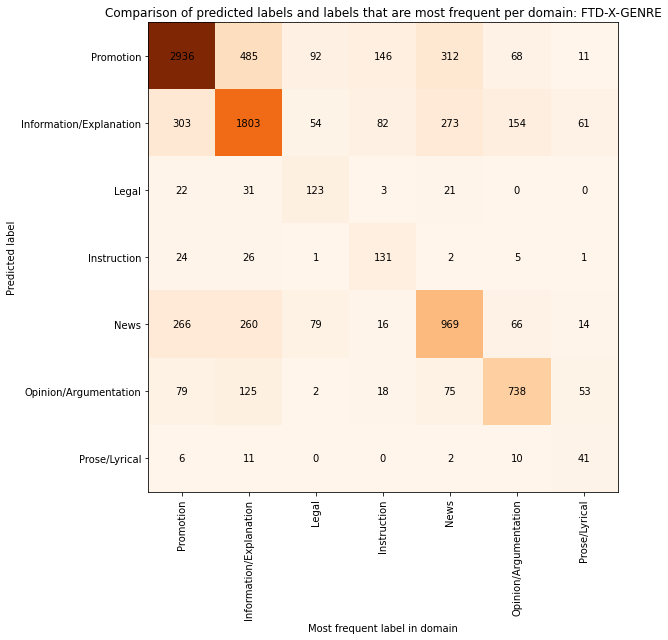

Classifier: CORE-X-GENRE
Macro F1: 0.54, Micro F1: 0.63, Accuracy: 0.63
Krippendorfs Alpha: 0.51
                         precision    recall  f1-score   support

Information/Explanation       0.79      0.68      0.73      4360
            Instruction       0.42      0.60      0.49       620
  Opinion/Argumentation       0.46      0.52      0.49      1450
                   News       0.61      0.62      0.62      1750
                  Forum       0.67      0.64      0.65      1460
                  Other       0.24      0.44      0.31       110
          Prose/Lyrical       0.40      0.60      0.48       250

               accuracy                           0.63     10000
              macro avg       0.51      0.58      0.54     10000
           weighted avg       0.65      0.63      0.64     10000



<Figure size 432x288 with 0 Axes>

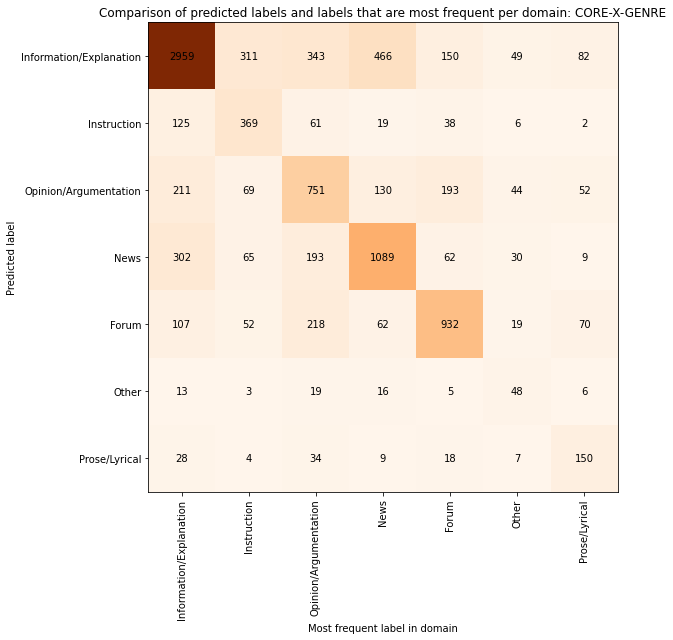

Classifier: X-GENRE
Macro F1: 0.53, Micro F1: 0.63, Accuracy: 0.63
Krippendorfs Alpha: 0.55
                         precision    recall  f1-score   support

                   News       0.74      0.62      0.67      2440
                  Legal       0.22      0.61      0.33        90
Information/Explanation       0.63      0.62      0.63      2210
              Promotion       0.74      0.69      0.72      1760
                  Other       0.13      0.41      0.20       160
            Instruction       0.41      0.60      0.49       420
  Opinion/Argumentation       0.70      0.62      0.66      2280
                  Forum       0.53      0.62      0.57       580
          Prose/Lyrical       0.40      0.70      0.51        60

               accuracy                           0.63     10000
              macro avg       0.50      0.61      0.53     10000
           weighted avg       0.67      0.63      0.64     10000



<Figure size 432x288 with 0 Axes>

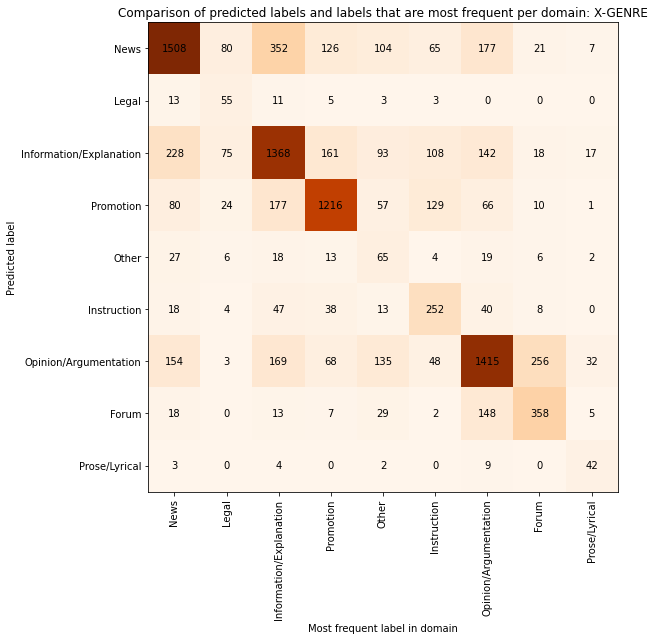

| Classifier    |   Accuracy |   Krippendorfs Alpha |   Macro F1 |   Micro F1 |   Macro precision |   Macro recall |
|:--------------|-----------:|---------------------:|-----------:|-----------:|------------------:|---------------:|
| FTD-X-GENRE   |       0.67 |                 0.56 |       0.56 |       0.67 |              0.52 |           0.65 |
| GINCO-X-GENRE |       0.6  |                 0.52 |       0.54 |       0.6  |              0.53 |           0.58 |
| CORE-X-GENRE  |       0.63 |                 0.51 |       0.54 |       0.63 |              0.51 |           0.58 |
| X-GENRE       |       0.63 |                 0.55 |       0.53 |       0.63 |              0.5  |           0.61 |
| GINCO         |       0.62 |                 0.53 |       0.52 |       0.62 |              0.5  |           0.59 |
| CORE          |       0.76 |                 0.57 |       0.51 |       0.76 |              0.47 |           0.59 |
| FTD           |       0.65 |                 0.56 |       0.49

<Figure size 432x288 with 0 Axes>

In [2]:
results_scores_based_on_domain = utils.scores_based_on_domains(extended_corpus, classifiers)

## Comparison of X-GENRE predictions based on the majority prediction
Focus only on X-genre and assume the domain label to be the one that has been chosen most by ALL classifiers, calculate F1, (microF1, macroF1). For this, we will use the extended corpus.

Number of ties when defining the majority label:
|     |   X-GENRE-majority-label-tie |
|:----|-----------------------------:|
| no  |                       0.8674 |
| yes |                       0.1326 |
Majority label distribution:
|                         |   X-GENRE-majority-label |
|:------------------------|-------------------------:|
| Information/Explanation |                   0.2663 |
| Promotion               |                   0.2089 |
| News                    |                   0.1755 |
| Opinion/Argumentation   |                   0.1562 |
| Forum                   |                   0.0641 |
| Instruction             |                   0.0586 |
| Other                   |                   0.0357 |
| Legal                   |                   0.0214 |
| Prose/Lyrical           |                   0.0133 |
Classifier: GINCO-X-GENRE
Macro F1: 0.73, Micro F1: 0.8, Accuracy: 0.8
                         precision    recall  f1-score   support

                   News 

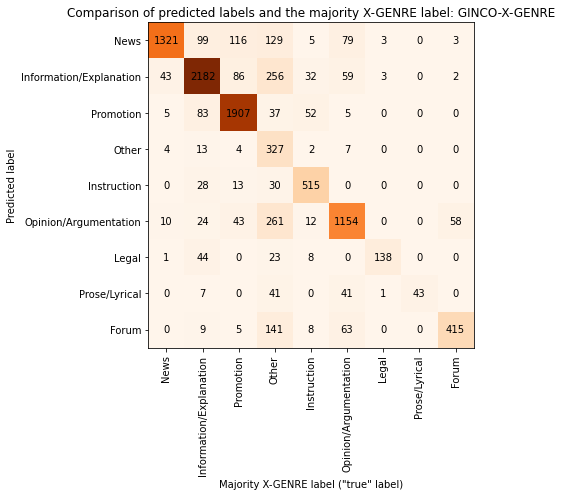

Classifier: FTD-X-GENRE
Macro F1: 0.68, Micro F1: 0.7, Accuracy: 0.67
                         precision    recall  f1-score   support

              Promotion       0.57      1.00      0.73      2089
Information/Explanation       0.73      0.75      0.74      2663
                  Legal       0.60      0.99      0.75       214
            Instruction       0.84      0.57      0.68       586
                   News       0.80      0.75      0.77      1755
  Opinion/Argumentation       0.63      0.42      0.50      1562
          Prose/Lyrical       0.52      0.71      0.61       133

              micro avg       0.67      0.74      0.70      9002
              macro avg       0.67      0.74      0.68      9002
           weighted avg       0.69      0.74      0.69      9002



<Figure size 432x288 with 0 Axes>

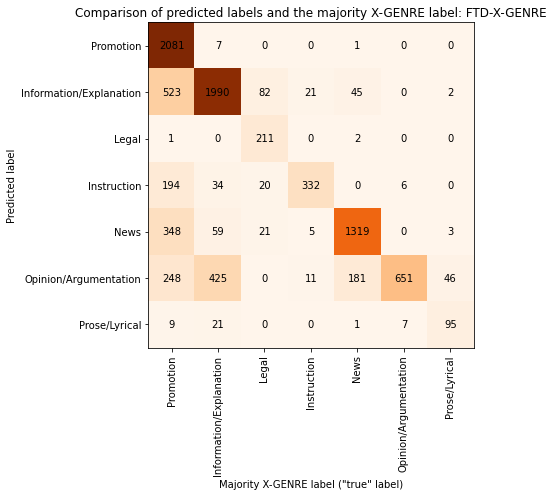

Classifier: CORE-X-GENRE
Macro F1: 0.6, Micro F1: 0.67, Accuracy: 0.6
                         precision    recall  f1-score   support

Information/Explanation       0.64      0.90      0.75      2663
            Instruction       0.53      0.78      0.63       586
  Opinion/Argumentation       0.51      0.53      0.52      1562
                   News       0.79      0.81      0.80      1755
                  Forum       0.44      0.96      0.60       641
                  Other       0.50      0.29      0.36       357
          Prose/Lyrical       0.35      0.96      0.51       133

              micro avg       0.60      0.77      0.67      7697
              macro avg       0.54      0.75      0.60      7697
           weighted avg       0.61      0.77      0.67      7697



<Figure size 432x288 with 0 Axes>

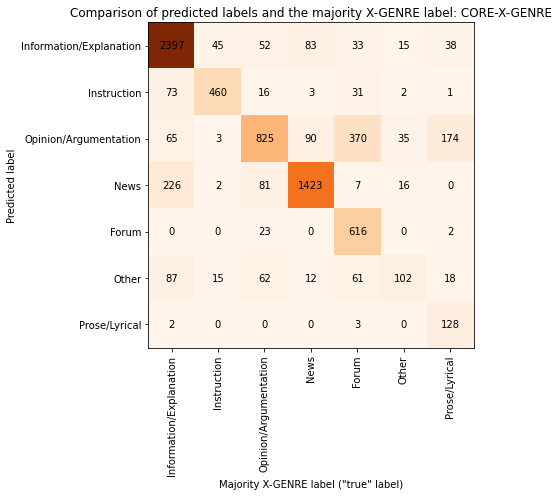

Classifier: X-GENRE
Macro F1: 0.83, Micro F1: 0.84, Accuracy: 0.84
                         precision    recall  f1-score   support

                   News       0.80      0.94      0.86      1755
                  Legal       0.76      0.87      0.81       214
Information/Explanation       0.95      0.77      0.85      2663
              Promotion       0.96      0.75      0.85      2089
                  Other       0.56      0.78      0.65       357
            Instruction       0.84      0.88      0.86       586
  Opinion/Argumentation       0.73      0.94      0.82      1562
                  Forum       0.86      0.90      0.88       641
          Prose/Lyrical       0.95      0.76      0.85       133

               accuracy                           0.84     10000
              macro avg       0.82      0.84      0.83     10000
           weighted avg       0.86      0.84      0.84     10000



<Figure size 432x288 with 0 Axes>

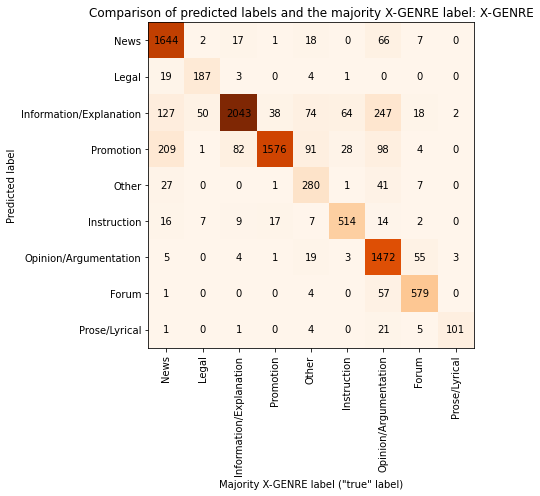

| Classifier    |   Accuracy |   Macro F1 |   Micro F1 |   Macro precision |   Macro recall |
|:--------------|-----------:|-----------:|-----------:|------------------:|---------------:|
| X-GENRE       |       0.84 |       0.83 |       0.84 |              0.82 |           0.84 |
| GINCO-X-GENRE |       0.8  |       0.73 |       0.8  |              0.82 |           0.74 |
| FTD-X-GENRE   |       0.67 |       0.68 |       0.7  |              0.67 |           0.74 |
| CORE-X-GENRE  |       0.6  |       0.6  |       0.67 |              0.54 |           0.75 |


<Figure size 432x288 with 0 Axes>

In [4]:
x_genre_majority_results = utils.scores_based_on_xgenre_majority(extended_corpus, "MaCoCu-is")

## Agreement between X-GENRE classifiers
For X-genre classifiers, calculate agreement between them via F1, macroF1, microF1 (one classifier y_pred, another y_true - confusion matrix).

Comparison of classifiers: GINCO-X-GENRE as y_true, FTD-X-GENRE as y_pred
Macro F1: 0.56, Micro F1: 0.63
                         precision    recall  f1-score   support

              Promotion       0.57      0.95      0.71      2174
Information/Explanation       0.60      0.66      0.63      2489
                  Legal       0.39      0.95      0.56       145
            Instruction       0.77      0.48      0.59       634
                   News       0.64      0.76      0.70      1384
  Opinion/Argumentation       0.53      0.39      0.45      1408
          Prose/Lyrical       0.17      0.72      0.28        43

              micro avg       0.58      0.70      0.63      8277
              macro avg       0.52      0.70      0.56      8277
           weighted avg       0.59      0.70      0.63      8277



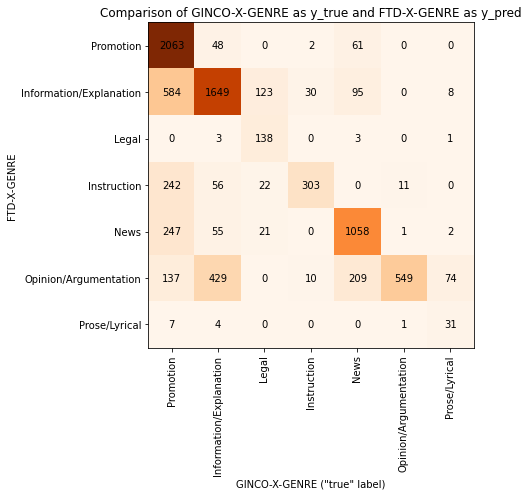

Comparison of classifiers: GINCO-X-GENRE as y_true, CORE-X-GENRE as y_pred
Macro F1: 0.43, Micro F1: 0.52
                         precision    recall  f1-score   support

Information/Explanation       0.54      0.82      0.65      2489
            Instruction       0.49      0.67      0.56       634
  Opinion/Argumentation       0.33      0.38      0.35      1408
                   News       0.60      0.77      0.67      1384
                  Forum       0.30      0.88      0.45       478
                  Other       0.42      0.07      0.12      1245
          Prose/Lyrical       0.11      0.98      0.20        43

              micro avg       0.46      0.60      0.52      7681
              macro avg       0.40      0.65      0.43      7681
           weighted avg       0.47      0.60      0.49      7681



<Figure size 432x288 with 0 Axes>

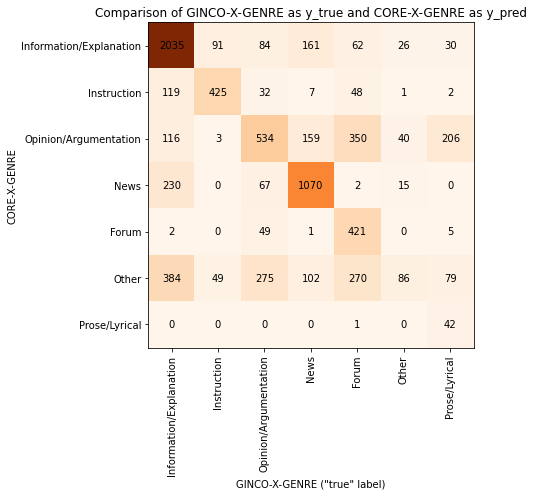

Comparison of classifiers: GINCO-X-GENRE as y_true, X-GENRE as y_pred
Macro F1: 0.65, Micro F1: 0.7
                         precision    recall  f1-score   support

                   News       0.63      0.93      0.75      1384
                  Legal       0.48      0.81      0.60       145
Information/Explanation       0.82      0.72      0.77      2489
              Promotion       0.89      0.67      0.76      2174
                  Other       0.55      0.22      0.32      1245
            Instruction       0.75      0.72      0.74       634
  Opinion/Argumentation       0.58      0.83      0.68      1408
                  Forum       0.55      0.78      0.65       478
          Prose/Lyrical       0.40      0.98      0.56        43

               accuracy                           0.70     10000
              macro avg       0.63      0.74      0.65     10000
           weighted avg       0.72      0.70      0.68     10000



<Figure size 432x288 with 0 Axes>

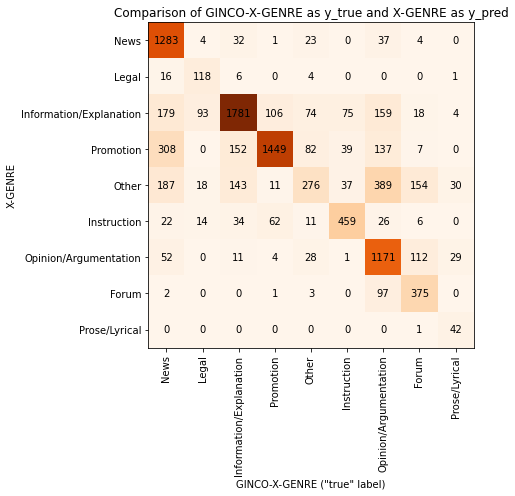

Comparison of classifiers: FTD-X-GENRE as y_true, GINCO-X-GENRE as y_pred
Macro F1: 0.56, Micro F1: 0.63
                         precision    recall  f1-score   support

              Promotion       0.95      0.57      0.71      3636
Information/Explanation       0.66      0.60      0.63      2741
                  Legal       0.95      0.39      0.56       351
            Instruction       0.48      0.77      0.59       396
                   News       0.76      0.64      0.70      1654
  Opinion/Argumentation       0.39      0.53      0.45      1041
          Prose/Lyrical       0.72      0.17      0.28       181

              micro avg       0.70      0.58      0.63     10000
              macro avg       0.70      0.52      0.56     10000
           weighted avg       0.76      0.58      0.64     10000



<Figure size 432x288 with 0 Axes>

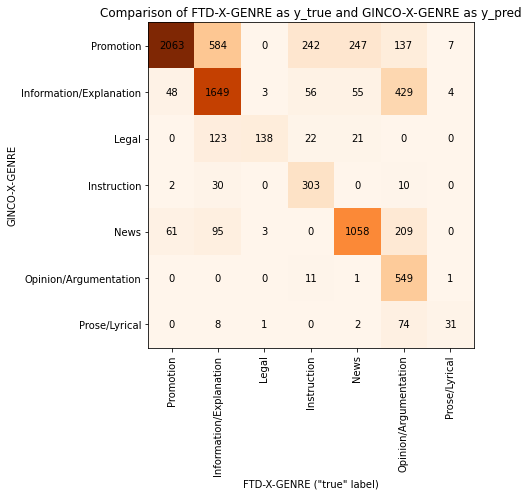

Comparison of classifiers: FTD-X-GENRE as y_true, CORE-X-GENRE as y_pred
Macro F1: 0.32, Micro F1: 0.4


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.

                         precision    recall  f1-score   support

              Promotion       0.00      0.00      0.00      3636
Information/Explanation       0.50      0.69      0.58      2741
                  Legal       0.00      0.00      0.00       351
            Instruction       0.31      0.68      0.42       396
                   News       0.65      0.70      0.68      1654
  Opinion/Argumentation       0.16      0.24      0.19      1041
          Prose/Lyrical       0.29      0.59      0.39       181

              micro avg       0.44      0.37      0.40     10000
              macro avg       0.27      0.41      0.32     10000
           weighted avg       0.28      0.37      0.32     10000



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

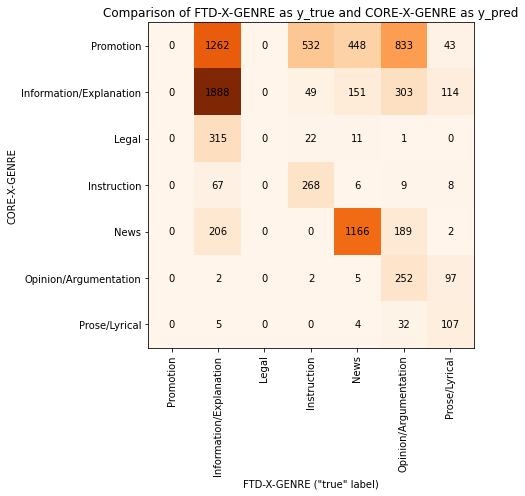

Comparison of classifiers: FTD-X-GENRE as y_true, X-GENRE as y_pred
Macro F1: 0.59, Micro F1: 0.6
                         precision    recall  f1-score   support

              Promotion       0.99      0.44      0.61      3636
Information/Explanation       0.71      0.56      0.63      2741
                  Legal       0.87      0.62      0.72       351
            Instruction       0.52      0.80      0.63       396
                   News       0.60      0.74      0.66      1654
  Opinion/Argumentation       0.31      0.61      0.41      1041
          Prose/Lyrical       0.66      0.39      0.49       181

              micro avg       0.64      0.56      0.60     10000
              macro avg       0.67      0.59      0.59     10000
           weighted avg       0.75      0.56      0.61     10000



<Figure size 432x288 with 0 Axes>

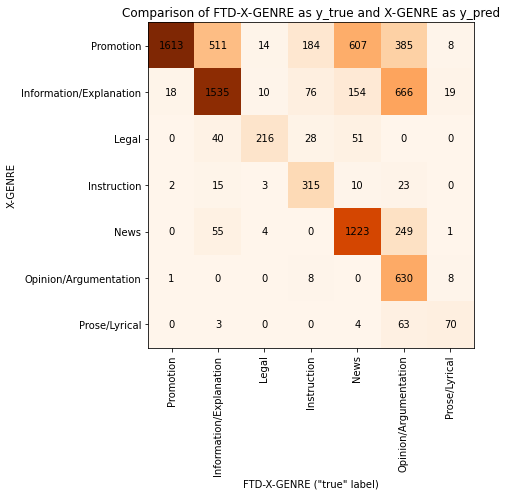

Comparison of classifiers: CORE-X-GENRE as y_true, GINCO-X-GENRE as y_pred
Macro F1: 0.33, Micro F1: 0.46


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/

                         precision    recall  f1-score   support

                   News       0.77      0.60      0.67      1791
Information/Explanation       0.82      0.54      0.65      3745
              Promotion       0.00      0.00      0.00         0
                  Other       0.07      0.42      0.12       203
            Instruction       0.67      0.49      0.56       873
  Opinion/Argumentation       0.38      0.33      0.35      1619
                  Legal       0.00      0.00      0.00         0
          Prose/Lyrical       0.98      0.11      0.20       371
                  Forum       0.88      0.30      0.45      1398

               accuracy                           0.46     10000
              macro avg       0.51      0.31      0.33     10000
           weighted avg       0.73      0.46      0.54     10000



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

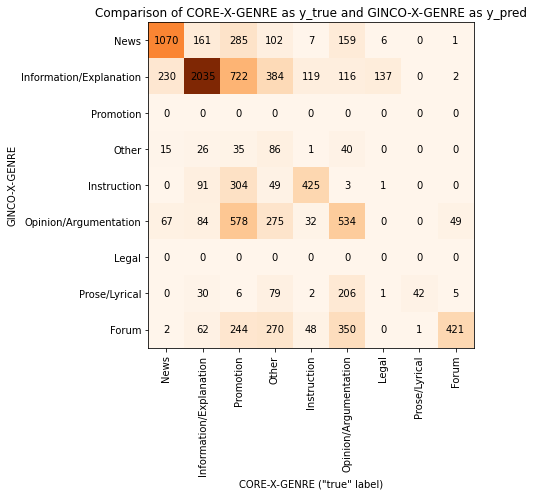

Comparison of classifiers: CORE-X-GENRE as y_true, FTD-X-GENRE as y_pred
Macro F1: 0.32, Micro F1: 0.4


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/

                         precision    recall  f1-score   support

              Promotion       0.00      0.00      0.00         0
Information/Explanation       0.69      0.50      0.58      3745
                  Legal       0.00      0.00      0.00         0
            Instruction       0.68      0.31      0.42       873
                   News       0.70      0.65      0.68      1791
  Opinion/Argumentation       0.24      0.16      0.19      1619
          Prose/Lyrical       0.59      0.29      0.39       371

              micro avg       0.37      0.44      0.40      8399
              macro avg       0.41      0.27      0.32      8399
           weighted avg       0.60      0.44      0.50      8399



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

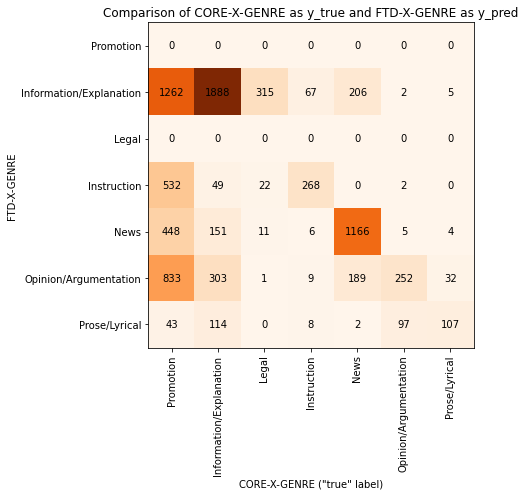

Comparison of classifiers: CORE-X-GENRE as y_true, X-GENRE as y_pred
Macro F1: 0.4, Micro F1: 0.53


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/

                         precision    recall  f1-score   support

                   News       0.69      0.79      0.73      1791
                  Legal       0.00      0.00      0.00         0
Information/Explanation       0.89      0.51      0.65      3745
              Promotion       0.00      0.00      0.00         0
                  Other       0.15      0.38      0.22       203
            Instruction       0.70      0.49      0.57       873
  Opinion/Argumentation       0.41      0.51      0.45      1619
                  Forum       0.88      0.42      0.57      1398
          Prose/Lyrical       0.95      0.27      0.42       371

               accuracy                           0.53     10000
              macro avg       0.52      0.37      0.40     10000
           weighted avg       0.74      0.53      0.60     10000



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

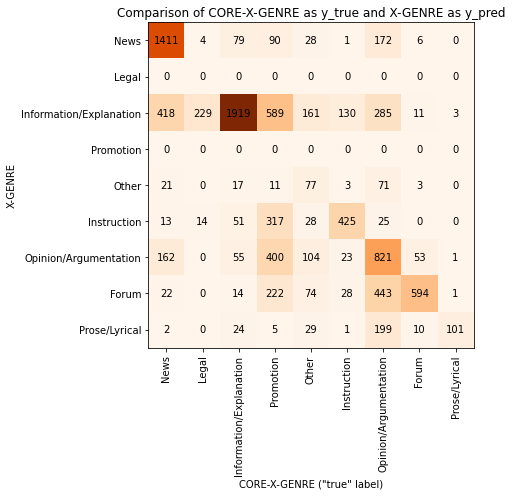

Comparison of classifiers: X-GENRE as y_true, GINCO-X-GENRE as y_pred
Macro F1: 0.65, Micro F1: 0.7
                         precision    recall  f1-score   support

                   News       0.93      0.63      0.75      2049
Information/Explanation       0.72      0.82      0.77      2159
              Promotion       0.67      0.89      0.76      1634
                  Other       0.22      0.55      0.32       501
            Instruction       0.72      0.75      0.74       611
  Opinion/Argumentation       0.83      0.58      0.68      2016
                  Legal       0.81      0.48      0.60       247
          Prose/Lyrical       0.98      0.40      0.56       106
                  Forum       0.78      0.55      0.65       677

               accuracy                           0.70     10000
              macro avg       0.74      0.63      0.65     10000
           weighted avg       0.76      0.70      0.71     10000



<Figure size 432x288 with 0 Axes>

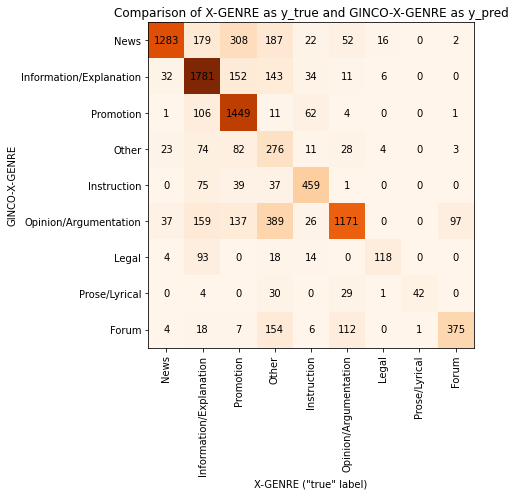

Comparison of classifiers: X-GENRE as y_true, FTD-X-GENRE as y_pred
Macro F1: 0.59, Micro F1: 0.6
                         precision    recall  f1-score   support

              Promotion       0.44      0.99      0.61      1634
Information/Explanation       0.56      0.71      0.63      2159
                  Legal       0.62      0.87      0.72       247
            Instruction       0.80      0.52      0.63       611
                   News       0.74      0.60      0.66      2049
  Opinion/Argumentation       0.61      0.31      0.41      2016
          Prose/Lyrical       0.39      0.66      0.49       106

              micro avg       0.56      0.64      0.60      8822
              macro avg       0.59      0.67      0.59      8822
           weighted avg       0.61      0.64      0.58      8822



<Figure size 432x288 with 0 Axes>

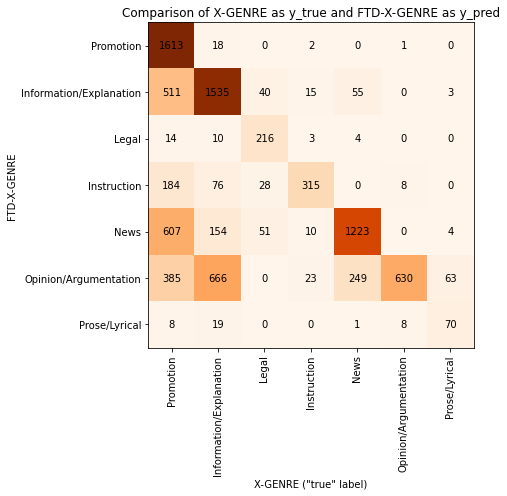

Comparison of classifiers: X-GENRE as y_true, CORE-X-GENRE as y_pred
Macro F1: 0.52, Micro F1: 0.59
                         precision    recall  f1-score   support

Information/Explanation       0.51      0.89      0.65      2159
            Instruction       0.49      0.70      0.57       611
  Opinion/Argumentation       0.51      0.41      0.45      2016
                   News       0.79      0.69      0.73      2049
                  Forum       0.42      0.88      0.57       677
                  Other       0.38      0.15      0.22       501
          Prose/Lyrical       0.27      0.95      0.42       106

              micro avg       0.53      0.66      0.59      8119
              macro avg       0.48      0.67      0.52      8119
           weighted avg       0.56      0.66      0.58      8119



<Figure size 432x288 with 0 Axes>

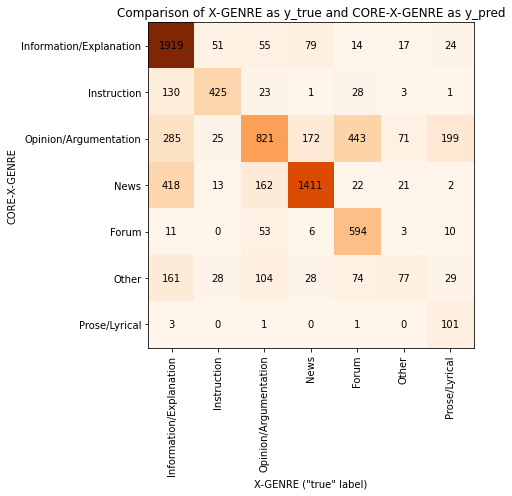

| Classifier as y_true   | Classifier as y_pred   |   Macro F1 |   Micro F1 |   Macro precision |   Macro recall |
|:-----------------------|:-----------------------|-----------:|-----------:|------------------:|---------------:|
| GINCO-X-GENRE          | X-GENRE                |       0.65 |       0.7  |              0.63 |           0.74 |
| X-GENRE                | GINCO-X-GENRE          |       0.65 |       0.7  |              0.74 |           0.63 |
| FTD-X-GENRE            | X-GENRE                |       0.59 |       0.6  |              0.67 |           0.59 |
| X-GENRE                | FTD-X-GENRE            |       0.59 |       0.6  |              0.59 |           0.67 |
| GINCO-X-GENRE          | FTD-X-GENRE            |       0.56 |       0.63 |              0.52 |           0.7  |
| FTD-X-GENRE            | GINCO-X-GENRE          |       0.56 |       0.63 |              0.7  |           0.52 |
| X-GENRE                | CORE-X-GENRE           |       0.52 |       0.59 |   

<Figure size 432x288 with 0 Axes>

In [4]:
utils.x_genre_classifier_agreement(extended_corpus)

# Analysis of which labels often occur together

I had another idea that we could analyse which labels occur together using the apriori algorithm which is used in association rule learning.

Main concepts:

- Support: It measures the number of times a particular item or combination of items occur in a dataset out of the number of all instances.
`Support(pair) = frequency_of_pair/no_of_instances`

- Confidence: It measures how likely the pair will occur given they the left value has been predicted - number of times both have been predicted together divided by a number of time the left value has been predicted (-> if the left value occurs very often, the confidence will be smaller)
`Confidence(pair (based of occurrence of left value)) = frequency_of_pair/frequency of left value`

- Lift: A lift is a metric that determines the strength of association between the best rules. It is obtained by taking confidence (based on the frequency of the left value and right value) dand diving it with support (for right value). 
`Lift(pair (based on occurrence of left value)) = Confidence(based on occurrence of left value)/Support(right value)}`

This means that if left value is very frequent -> confidence is smaller, if the pair does not occur together very often, it won't reach the confidence limit. The frequency of right value does not impact the confidence, but it does impact the lift. For the same number of occurences of the pair, the lift is higher if one of them is infrequent than if both were frequent. The bigger support (frequency of the pair occuring together), the bigger is lift.

two most frequent values, always occurring together:
left = 7
right = 7

occur = 7/10
total = 10

confidence = 7/10 / 7/10 = 1

support = 7/10

lift = 1 / 0.7 = 1.42

-----------
two not so frequent values always occurring together:

left = 4
right = 4

occur = 4/10

confidence = 1

support = 0.4

lift = 1/0.4 = 2.5

In [4]:
utils.calculate_apriori(extended_corpus, classifiers)

/home/tajak/Genre-Datasets-Comparison/Genre-Datasets-Comparison/Comparison-on-MaCoCu-data/Comparison-on-MaCoCu-is/utils.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_small[i] = "{}: ".format(i) + corpus_small[i].astype(str)


Comparison: FTD with GINCO
| Left_Hand_Side          | Right_Hand_Side                |   Support |   Confidence |     Lift |
|:------------------------|:-------------------------------|----------:|-------------:|---------:|
| GINCO: Legal/Regulation | FTD: A9 (legal)                |    0.0106 |     0.929825 | 38.5819  |
| FTD: A7 (instruction)   | GINCO: Instruction             |    0.0306 |     0.69863  | 13.592   |
| FTD: A8 (news)          | GINCO: News/Reporting          |    0.0679 |     0.746154 |  4.82323 |
| FTD: A11 (personal)     | GINCO: Opinion/Argumentation   |    0.0566 |     0.702233 |  3.15469 |
| GINCO: Promotion        | FTD: A12 (promotion)           |    0.1383 |     0.951169 |  3.1145  |
| FTD: A16 (information)  | GINCO: Information/Explanation |    0.1517 |     0.748028 |  3.03091 |
| GINCO: Forum            | FTD: A1 (argumentative)        |    0.0355 |     0.5573   |  2.90866 |
| FTD: A1 (argumentative) | GINCO: Opinion/Argumentation   |    0.0958 |     0.5  